# Ejercicio resuelto del  texto de Maning, en el cuál se obtiene una matriz de tf-idf pesos a partir  de una matriz de palabras vs documentos.

In [2]:
import pandas as pd
 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
 
# this is a very toy example, do not try this at home unless you want to understand the usage differences
docs=["Shipment of gold demaged in a fire",
      "Delivery of silver arrived in a silver truck",
      "Shipment of gold arrived in a truck"]
      
     
docs1=['I love Brazil. Brazil!',
                      'Sweden is best',
                      'Germany beats both']

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(docs1)

In [4]:
import pandas as pd
df_tfidf = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names())
print(df_tfidf)

     beats     best     both    brazil  germany       is      love   sweden
0  0.00000  0.00000  0.00000  0.894427  0.00000  0.00000  0.447214  0.00000
1  0.00000  0.57735  0.00000  0.000000  0.00000  0.57735  0.000000  0.57735
2  0.57735  0.00000  0.57735  0.000000  0.57735  0.00000  0.000000  0.00000


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np

smooth_idf = True
norm_idf = True

# making one hot vector
wc = CountVectorizer()
x = wc.fit_transform(docs1)
wcX = np.array(x.toarray())
print(wcX)

[[0 0 0 2 0 0 1 0]
 [0 1 0 0 0 1 0 1]
 [1 0 1 0 1 0 0 0]]


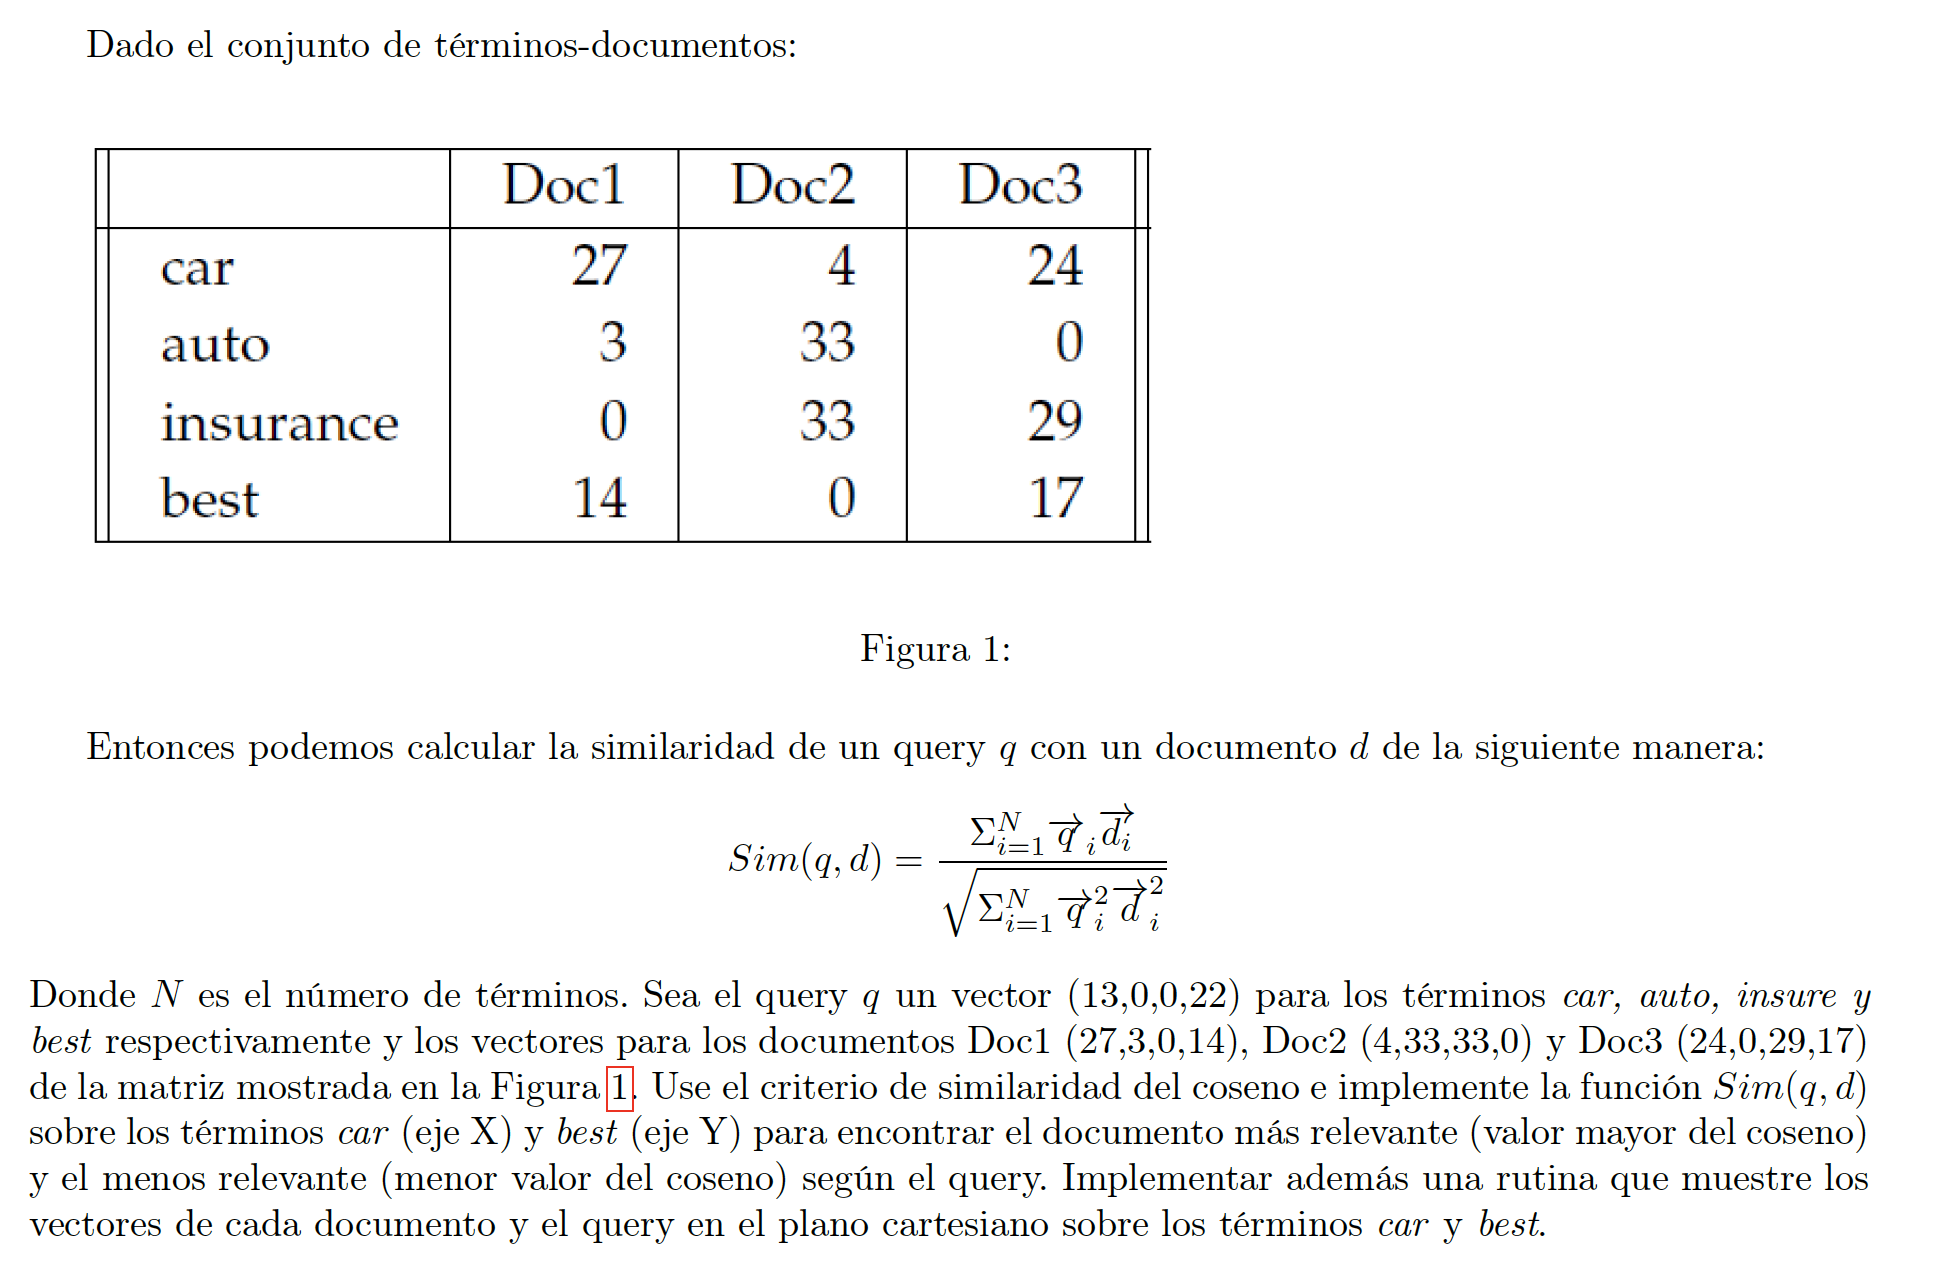

In [6]:
from IPython.display import Image
Image(filename='tf1.png')

In [7]:
import numpy as np
# term frequency
w=np.array([[27, 3, 0, 14], [4, 33, 33, 0], [24, 0, 29, 17]])
# term frequency
#N1 = wcX.shape[0]
N = w.shape[0]
print(N)
tf = np.array([w[i, :] / np.sum(w, axis=1)[i] for i in range(N)])
#tf = pd.DataFrame(tf, columns=w.get_feature_names())
print('tf con normalización de vectores')
print(tf)
# inverse documents frequency
df = np.count_nonzero(w, axis=0)
print(df)
# Este es el df  e idf del texto de Manning 
df1=np.array([18165, 6723, 19241, 25235])
print(df1)
N=806791
idf1 = np.log10((1 + N) / (1 + df1)) + 1  if smooth_idf else np.log( N / df1 )
idf2 = np.log10( N / df1 )
print('idf........')
print(idf2)
# normalize
tfidf1= tf*idf2
tfidf = normalize(tf*idf1) if norm_idf else tf*idf1
#tfidf = pd.DataFrame(tfidf, columns=wc.get_feature_names())
print('Matriz tf-idf................')
print(tfidf1)

3
tf con normalización de vectores
[[0.61363636 0.06818182 0.         0.31818182]
 [0.05714286 0.47142857 0.47142857 0.        ]
 [0.34285714 0.         0.41428571 0.24285714]]
[3 2 2 2]
[18165  6723 19241 25235]
idf........
[1.64752564 2.07919793 1.62253341 1.50475774]
Matriz tf-idf................
[[1.01098164 0.1417635  0.         0.47878655]
 [0.09414432 0.98019331 0.76490861 0.        ]
 [0.56486593 0.         0.67219241 0.36544116]]
